<a href="https://colab.research.google.com/github/sudeepkanthala/ICP-8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADDING HIDDEN LAYER TO THE AUTOENCODER AND VISUALIZING THE DATA**

Epoch 1/5
235/235 [==============================] - 5s 16ms/step - loss: 0.6954 - val_loss: 0.6952
Epoch 2/5
235/235 [==============================] - 5s 23ms/step - loss: 0.6950 - val_loss: 0.6948
Epoch 3/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


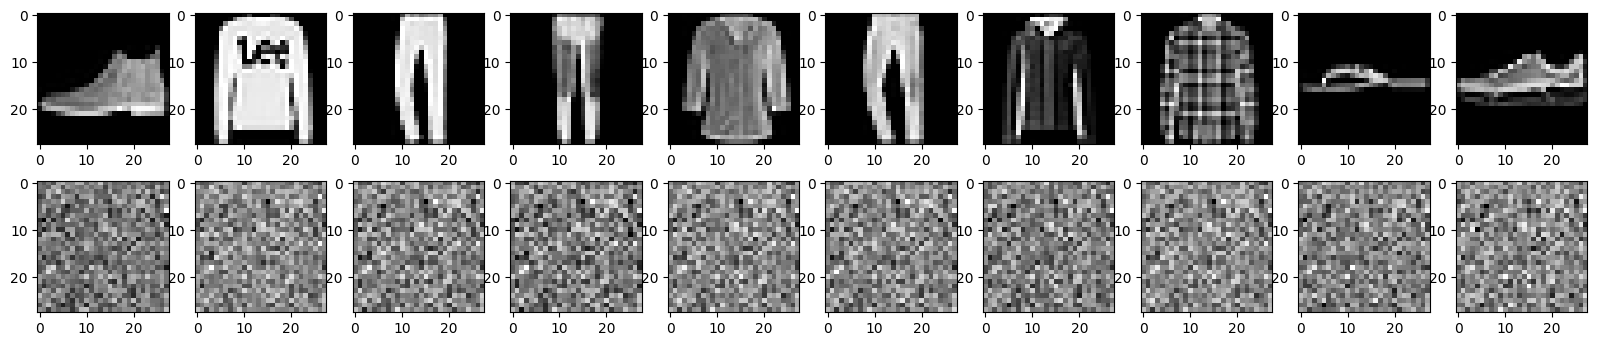

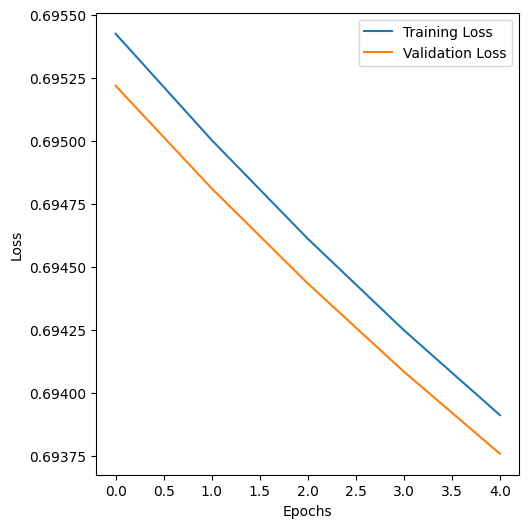

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

# Define the size of encoded representations and the additional hidden layer size
encoding_dim = 32
hidden_dim = 64

# Input placeholder
input_img = Input(shape=(784,))

# First encoding layer
encoded1 = Dense(hidden_dim, activation='relu')(input_img)

# Second encoding layer
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# First decoding layer
decoded1 = Dense(hidden_dim, activation='relu')(encoded2)

# Second decoding layer
decoded = Dense(784, activation='sigmoid')(decoded1)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


# Predict and visualize one of the reconstructed test data
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))

plt.show()

# Visualize the loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



**ADDING HIDDEN LAYER TO THE DENOISING AUTOENCODER AND VISUALIZING THE DATA**

Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.6947 - val_loss: 0.6947
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6946 - val_loss: 0.6946
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


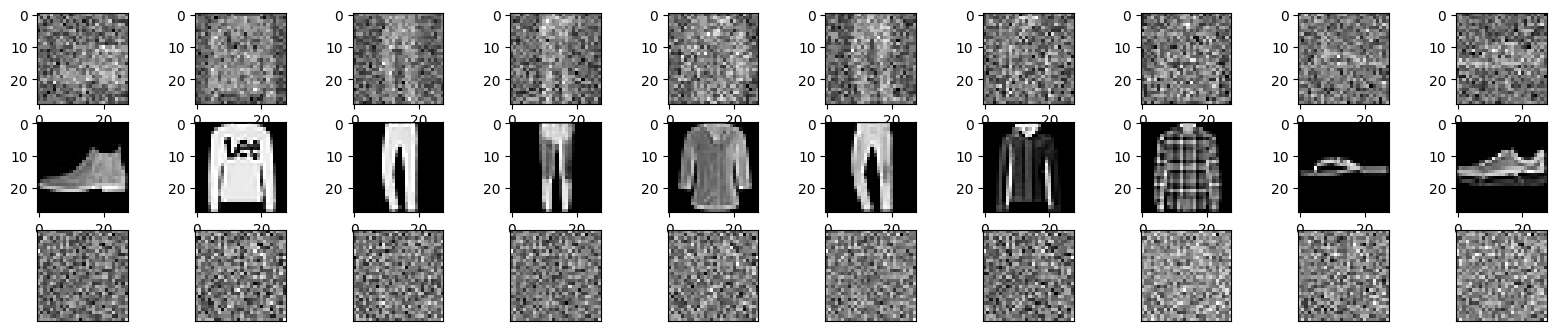

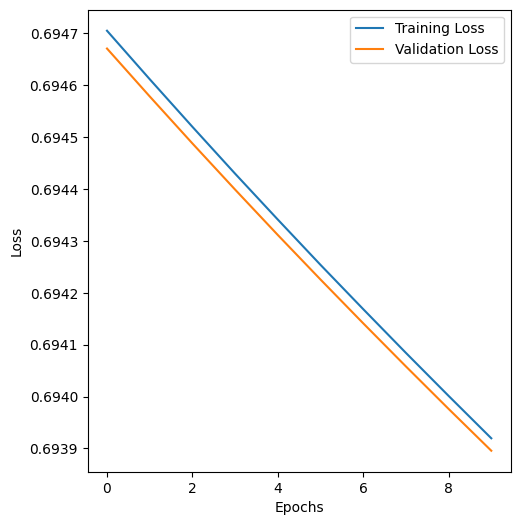

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Define the size of encoded representations and the additional hidden layer size
encoding_dim = 32
hidden_dim = 64

# Input placeholder for noisy data
input_img = Input(shape=(784,))

# First encoding layer
encoded1 = Dense(hidden_dim, activation='relu')(input_img)

# Second encoding layer
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# First decoding layer
decoded1 = Dense(hidden_dim, activation='relu')(encoded2)

# Second decoding layer
decoded = Dense(784, activation='sigmoid')(decoded1)

# Create the denoising autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the denoising autoencoder model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
from keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the denoising autoencoder
history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

# Predict and visualize one of the reconstructed test data
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))

    # Display original images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))

plt.show()

# Visualize the loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
